# Online Social Networks, Hilary Term 2020
## Week 2 Formative Assignment

You will be marked for correct output and for following the instructions carefully.  

Remember to name this file correctly. So if your surname is "Turing", the file you submit should be:
TURING_OSN20_Week02_Formative.ipynb 

Be careful that the extension is not .json. **Edit it above now where it says SURNAME before you continue.** 

This exercise will require you to download the ```OSN20_BartDemo.graphml``` file from the exercises folder.

In [154]:
# RUN ME FIRST 

import networkx as nx
import pandas as pd
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


The average degree is 6.56 for this network


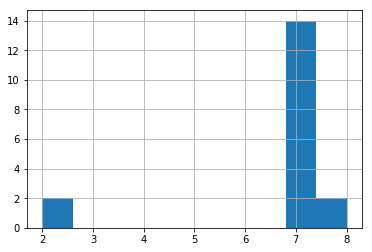

In [155]:
# Exercise 1. 
# 
# Below is some code that will create a random graph. 
# Plot the degree sequence of that graph. 

g = nx.barbell_graph(8,2)

# Answer Below here. 
#*********************************

result = nx.degree(g)
deg_series = pd.Series(dict(result))
print("The average degree is {:.2f} for this network".format(deg_series.mean()))
deg_series.hist() 

# Instructor comments below here. 
#*********************************


ex1 = None # (out of 5)



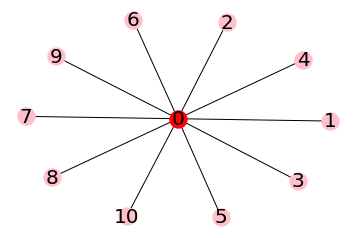

In [156]:
# Exercise 2. 
#
# This time plot the graph, but color the node of highest degree differently. 
# Hint: You can use two nx.draw_networkx_nodes statements, 
# one with (g_1,pos,color="Red") and the other with (g_2,pos,color="Blue"). 
# The trick is how to create two subgraphs? 

g = nx.star_graph(10)

# Answer Below here. 
#*********************************

pos = nx.spring_layout(g)

nx.draw_networkx_nodes(g, pos, 
                       nodelist = [0],
                       node_color = "Red")
nx.draw_networkx_nodes(g, pos, 
                       nodelist = [1, 2, 3, 4, 5,
                                  6, 7, 8, 9, 10],
                       node_color = "Pink")

nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, font_size = 20, 
                        font_family = 'sans-serif')
plt.axis('off')
plt.show()

# is there a way to do this without selecting [0] but to select based on a condition? What is the syntax?

# Instructor comments below here. 
#*********************************


ex2 = None # (out of 5)




Populating the interactive namespace from numpy and matplotlib


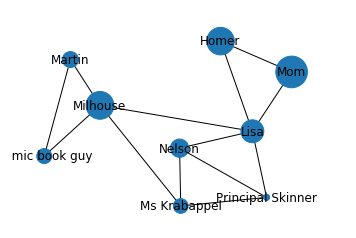

Homer has 2 connections.
Marge has 2 connections.


In [157]:
# Who has more connections, Homer or Marge? 
# In the demo network for class, this is the world from Bart's point of view. 
# In this network, who has a higher degree, Homer or Marge? 
# Please answer this using Python code. 

# Answer Below here. 
#*********************************

import matplotlib.pyplot as plt
%pylab inline

file = "OSN20_BartDemo.graphml"
g = nx.read_graphml(file)

# these three functions taken from class exercises
def getPositionNC(netcanvas_graph):
    g = netcanvas_graph 
    return {ID: (g.nodes[ID]['sg_layout1X'],1-g.nodes[ID]['sg_layout1Y']) for ID in g.nodes}

def getLabelNC(netcanvas_graph,label="name"):
    g = netcanvas_graph
    return {ID: g.nodes[ID][label] for ID in g.nodes}

def getNodeSizeNC(netcanvas_graph,sizevar=None,multiplier=1000):
    g = netcanvas_graph    
    try: 
        return [float(g.nodes[ID][sizevar])*multiplier for ID in g.nodes]
    except KeyError: return None
    except ValueError: return None

pos = getPositionNC(g)
nx.draw_networkx_nodes(g, pos, node_size=getNodeSizeNC(g,"a_closeness") )
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos,getLabelNC(g))

plt.axis('off')
plt.show()

print("Homer has", g.degree("b1abeee0-ffb1-481f-8ed1-3d6e08860f3d"), "connections.")
print("Marge has", g.degree("7d868af7-211e-407f-8ea4-fb480f05e46d"), "connections.")
    
# Instructor comments below here. 
#*********************************


ex3 = None # (out of 5)



In [158]:
# Exercise 4. Comparing within a DataFrame
# 
# Who are better connected in Simpsons network, men or women? 
# Create a DataFrame with bart.graphml as was done in class. 
# If your DataFrame is named networkdf, this snippet will produce a slice for men. 
# networkdf_men = networkdf[networkdf['a_gender']==1]
# The 'a_gender' value for women is 0. 
#
# Get the average degree from that slice. Do the same for women. 
# Who has a higher average degree, men or women? 

# Answer Below here. 
#*********************************

file = "OSN20_BartDemo.graphml"
g = nx.read_graphml(file)

df = pd.DataFrame.from_dict(dict(g.nodes), orient = "index")
df["degree"] = pd.Series(dict(nx.degree(g)))
# display(df)

df_men = df[df['a_gender'] == 1]
# display(df_men)

df_women = df[df['a_gender'] == 0]
# display(df_women)

print("The men have {:.2f}".format(df_men["degree"].mean()), "connections on average.")
print("The women have {:.2f}".format(df_women["degree"].mean()), "connections on average.")
print("The women have a higher average degree.")

# Instructor comments below here. 
#*********************************


ex4 = None # (out of 5)



The men have 2.67 connections on average.
The women have 3.33 connections on average.
The women have a higher average degree.
